<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [9]:
movies = pd.read_csv('data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [10]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [11]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [12]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [44]:
movies.sort_values('duration', ascending=False).tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

(array([ 25., 168., 301., 259., 111.,  66.,  27.,  14.,   5.,   3.]),
 array([ 64. ,  81.8,  99.6, 117.4, 135.2, 153. , 170.8, 188.6, 206.4,
        224.2, 242. ]),
 <a list of 10 Patch objects>)

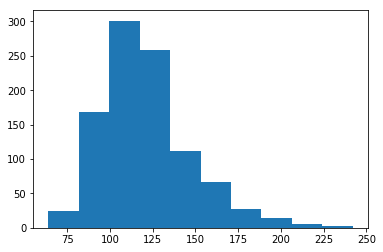

In [15]:
# Answer:
plt.hist(movies.duration, bins=10)

#### Use a box plot to display that same data.

{'boxes': [<matplotlib.lines.Line2D at 0x1e090a30390>],
 'caps': [<matplotlib.lines.Line2D at 0x1e090a30da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e090a3ca58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e090a3c630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e090a304e0>,
  <matplotlib.lines.Line2D at 0x1e090a30978>]}

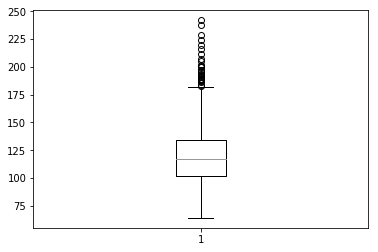

In [16]:
# Answer:
plt.boxplot(movies.duration)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [17]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

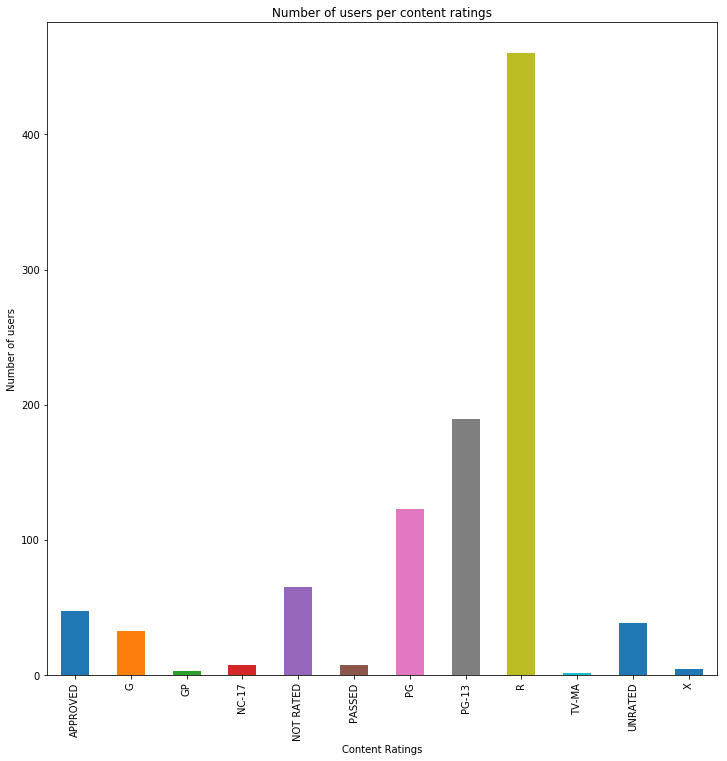

In [18]:
# Answer:
movies.content_rating.value_counts().sort_index().plot(kind='bar',figsize=(12,12))
plt.xlabel('Content Ratings');
plt.ylabel('Number of users');
plt.title('Number of users per content ratings');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

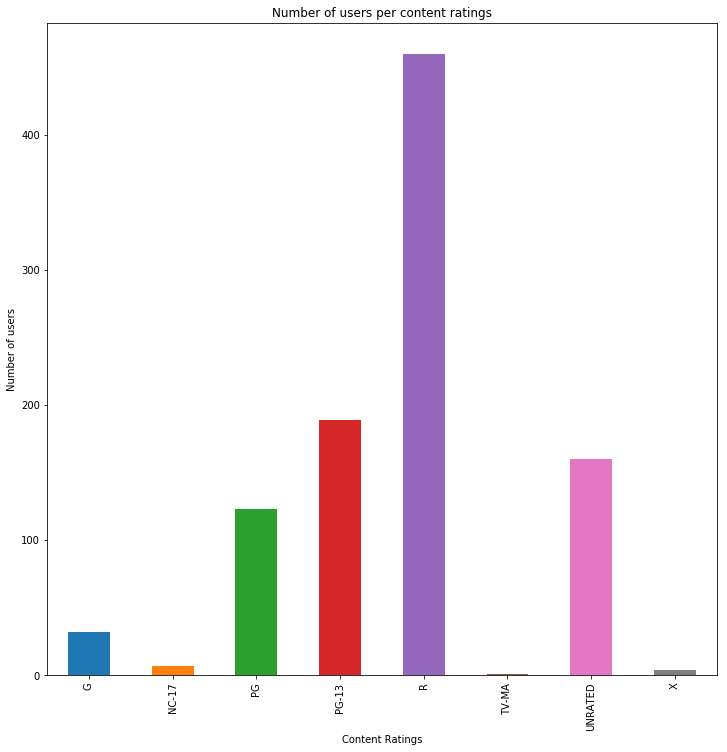

In [19]:
# Answer:
movies.content_rating.replace('NOT RATED', 'UNRATED', inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED', inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED', inplace=True)
movies.content_rating.replace('GP', 'UNRATED', inplace=True)
movies.content_rating.value_counts().sort_index().plot(kind='bar',figsize=(12,12))
plt.xlabel('Content Ratings');
plt.ylabel('Number of users');
plt.title('Number of users per content ratings');

#### Convert the following content ratings to "NC-17": X, TV-MA.

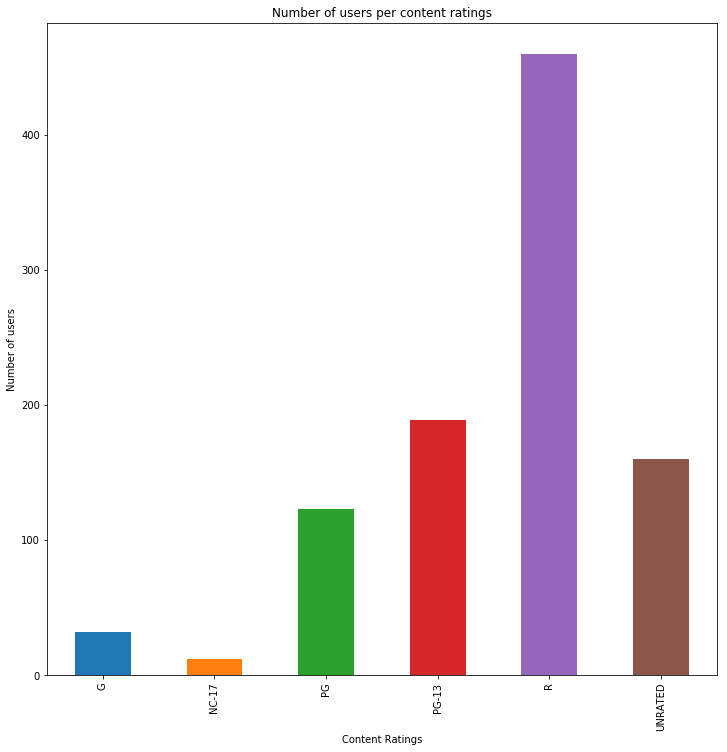

In [27]:
# Answer:
movies.content_rating.replace('X', 'NC-17', inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17', inplace=True)
movies.content_rating.value_counts().sort_index().plot(kind='bar',figsize=(12,12))
plt.xlabel('Content Ratings');
plt.ylabel('Number of users');
plt.title('Number of users per content ratings');

#### Count the number of missing values in each column.

In [20]:
# Answer:
#movies.shape
#(979,6)
print("Null/ missing values in star_rating column = "+ str(movies.star_rating.isnull().sum()))
print("Null/ missing values in title column = "+ str(movies.title.isnull().sum()))
print("Null/ missing values in content_rating column = "+ str(movies.content_rating.isnull().sum()))
print("Null/ missing values in genre column = "+ str(movies.genre.isnull().sum()))
print("Null/ missing values in duration column = "+ str(movies.duration.isnull().sum()))
print("Null/ missing values in actors_list column = "+ str(movies.actors_list.isnull().sum()))

Null/ missing values in star_rating column = 0
Null/ missing values in title column = 0
Null/ missing values in content_rating column = 3
Null/ missing values in genre column = 0
Null/ missing values in duration column = 0
Null/ missing values in actors_list column = 0


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [21]:
# Answer:
movies['content_rating'].fillna('NOT RATED', inplace=True)
#movies.groupby(['genre','content_rating']).size()

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:
'''less_2h = movies[movies['duration'] < 120]['star_rating'].mean()
print(less_200)
more_2h = movies[movies['duration'] >= 120]['star_rating'].mean()
print(more_200)
'''
if ((movies[movies['duration'] >= 120]['star_rating'].mean()) > (movies[movies['duration'] < 120]['star_rating'].mean())):
    print("Average rating of 2 hours+ duration is more")
else:
    print("Average rating of 2 hours+ duration is less")

Average rating of 2 hours+ duration is more


#### Use a visualization to detect whether there is a relationship between duration and star rating.

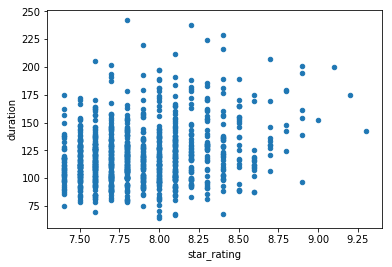

In [24]:
# Answer:
#movies.star_rating.value_counts()
#movies.duration.value_counts()
movies.plot(kind='scatter',x='star_rating',y='duration')

#### Calculate the average duration for each genre.

In [52]:
movies['duration'].groupby(movies['genre']).mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0.5,1,'Content Rating Versus Average Duration')

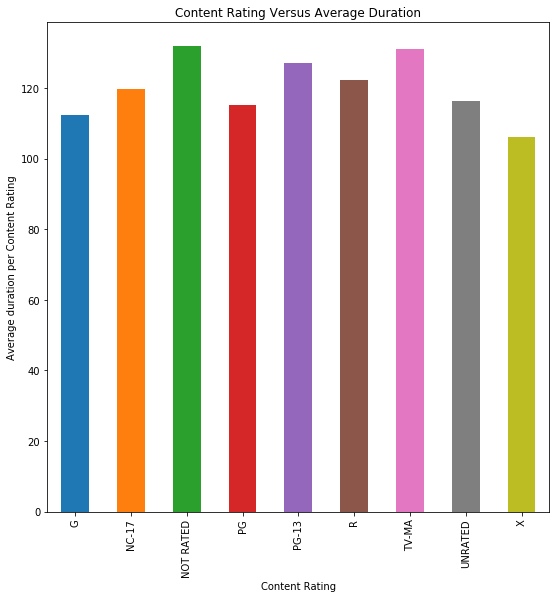

In [36]:
# Answer:
#movies.head()
#movies.plot(kind='scatter',y='content_rating',x='duration')
## Answer:
#plt.boxplot(movies.duration)
movies['duration'].groupby(movies['content_rating']).mean().plot(kind='bar',figsize=(9,9))
plt.xlabel('Content Rating')
plt.ylabel('Average duration per Content Rating')
plt.title('Content Rating Versus Average Duration')

#### Determine the top rated movie (by star rating) for each genre.

In [80]:
# Answer:
#for g , r in movies['star_rating'].groupby(movies['genre']).agg('max')print(g)
grouped = movies['star_rating'].groupby(movies['genre']).agg('max')
#grouped
i=0
for gen in grouped.index:
    #print(gen)
    #print(grouped[i])
    print("Genre = " + gen + " | Move Title = " + movies[(movies.genre == gen) & (movies.star_rating == grouped[i])].title)
    i=i+1
    print("----------------------")

3    Genre = Action | Move Title = The Dark Knight
Name: title, dtype: object
----------------------
7    Genre = Adventure | Move Title = The Lord of t...
Name: title, dtype: object
----------------------
30    Genre = Animation | Move Title = Spirited Away
Name: title, dtype: object
----------------------
8    Genre = Biography | Move Title = Schindler's List
Name: title, dtype: object
----------------------
25    Genre = Comedy | Move Title = Life Is Beautiful
29          Genre = Comedy | Move Title = City Lights
35         Genre = Comedy | Move Title = Modern Times
Name: title, dtype: object
----------------------
0    Genre = Crime | Move Title = The Shawshank Red...
Name: title, dtype: object
----------------------
5    Genre = Drama | Move Title = 12 Angry Men
9      Genre = Drama | Move Title = Fight Club
Name: title, dtype: object
----------------------
468    Genre = Family | Move Title = E.T. the Extra-T...
Name: title, dtype: object
----------------------
638    Genre = Fan

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [108]:
# Answer:
movies[movies.title.duplicated()].title
#482,905,924.936
#movies[movies.title =='Dracula']

482    The Girl with the Dragon Tattoo
905                            Dracula
924                     Les Miserables
936                          True Grit
Name: title, dtype: object

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [127]:
# Answer:
s = movies.genre.value_counts()>10
i=0
for g in s.index:
    if s[i]==True:
        print("Genre = " + g + " | Average start rating = " + str(movies[movies.genre==g]['star_rating'].mean()))
    i=i+1


Genre = Drama | Average start rating = 7.902517985611515
Genre = Comedy | Average start rating = 7.82243589743591
Genre = Action | Average start rating = 7.88455882352942
Genre = Crime | Average start rating = 7.916935483870971
Genre = Biography | Average start rating = 7.862337662337664
Genre = Adventure | Average start rating = 7.933333333333332
Genre = Animation | Average start rating = 7.914516129032259
Genre = Horror | Average start rating = 7.8068965517241375
Genre = Mystery | Average start rating = 7.975


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!